#### ADALINE : ADAptive LInear NEuron classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import utility

In [3]:
df = pd.read_csv("iris.data.txt", header=None)

In [4]:
y = df.iloc[0:100, 4].values # first 100 samples, of 4th column, only Iris-setosa, Iris-versicolor
y = np.where(y == "Iris-setosa", -1, 1) # Iris-setosa = -1, Iris-versicolor = 1
y.shape

(100,)

In [5]:
X = df.iloc[0:100, [0,2]].values # get only 0 and 2 column, sepal length and petal length
X.shape

(100, 2)

In [6]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #print("w : ", self.w_) # w :  [ 0.01624345 -0.00611756 -0.00528172]
        #print("w shape : ", self.w_.shape) # w shape :  (3,) column vector
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            #print("net input shape : ", net_input.shape) # net input shape :  (100,)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            #print("y ", y.shape, " output ", output.shape, " errors ", errors.shape)
            # y  (100,)  output  (100,)  errors  (100,)
            # X.shape (100, 2), X transpose is necessary to do dot product
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum() 
            # in SGD, you don't need sum, as it is for single sample
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # X.shape (100, 2)
        # self.w_.shape (3, ), you can do dot product since taking second two features
        # dimensions match, (100, 2) x (2, 1) = (100, 1)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [7]:
ada1 = AdalineGD(n_iter=10, eta=0.01)
ada1.fit(X, y)

In [8]:
print(ada1.cost_)

[51.08122709777622, 3212.0017330638293, 5006791.287179791, 7811818375.78158, 12188352557082.277, 1.901681925486386e+16, 2.967090202540118e+19, 4.629388412448567e+22, 7.222981308409787e+25, 1.126962232016361e+29]


In [9]:
ada2 = AdalineGD(n_iter=10, eta=0.0001)
ada2.fit(X, y)

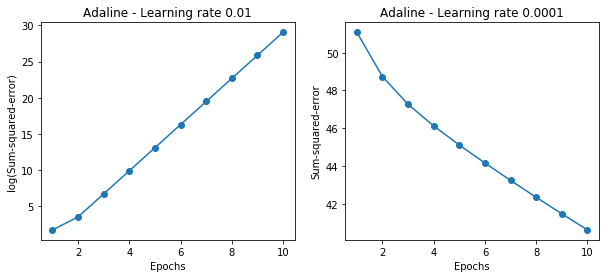

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

#ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()